In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Conv3D, BatchNormalization
from keras import backend as K
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import pandas as pd
import glob
import argparse
import random
import cv2
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.
/home/arshid/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/arshid/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/arshid/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/arshid/anaconda3/lib/python3.7/site-packages/tenso

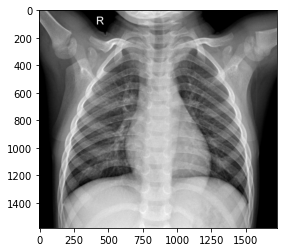

In [56]:
im=cv2.imread('/media/arshid/OS/Users/best/Desktop/tablu____/corona/train/NO/IM-0135-0001.jpeg')
imshow(im)
im = cv2.resize(im, (128,128))

In [57]:
os.listdir('/media/arshid/OS/Users/best/Desktop/tablu____/corona')

['test', 'train', 'val']

# This is for read the dataset making ready for training

In [58]:
img_dims = (128,128,3)
data = []
labels = []

# load image files from the dataset
image_files = [f for f in glob.glob('/media/arshid/OS/Users/best/Desktop/tablu____/corona'+ "/**/*.jpeg", recursive=True) if not os.path.isdir(f)] 
random.seed(42)
random.shuffle(image_files)

# create groud-truth label from the image path
for img in image_files:
    image = cv2.imread(img)
    image = cv2.resize(image,(128,128))
    image = img_to_array(image)
    data.append(image)
    label = img.split(os.path.sep)[-2]
    #print(label)
    if label == "NO":
        label = 1
    else:
        label = 0  
    labels.append([label])

# pre-processing
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

# split dataset for training and validation
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2,
                                                  random_state=42)
trainY = to_categorical(trainY, num_classes=2)
testY = to_categorical(testY, num_classes=2)

In [59]:
testY

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [60]:
data = np.array(data)
data.shape

(224, 128, 128, 3)

# Data Augmentation
Data augmentation is a strategy that enables practitioners to significantly increase the diversity of data available for training models, without actually collecting new data. Data augmentation techniques such as cropping, padding, and horizontal flipping are commonly used to train large neural networks.

In [61]:
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
                         horizontal_flip=True, fill_mode="nearest")


# CNN
In deep learning, a convolutional neural network (CNN, or ConvNet) is a class of deep neural networks, most commonly applied to analyzing visual imagery.

In [62]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(3, 3),  activation ='selu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (3,3), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (3,3), activation ='relu', padding = 'Same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(128, kernel_size = (3,3), activation ='relu', padding = 'Same'))
model.add(Conv2D(128, kernel_size = (3,3), activation ='relu', padding = 'Same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
batch_normalization_5 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 42, 42, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 42, 42, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 42, 42, 64)        18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 42, 42, 64)       

In [63]:

H = model.fit_generator(aug.flow(trainX, trainY, batch_size=32),
                        validation_data=(testX,testY),steps_per_epoch=len(trainX),
                        epochs=5, verbose=1)

Epoch 1/5
179/179 [==============================] - 227s 1s/step - loss: 0.0924 - accuracy: 0.9749 - val_loss: 33.2394 - val_accuracy: 0.3111
Epoch 2/5
179/179 [==============================] - 225s 1s/step - loss: 0.0241 - accuracy: 0.9922 - val_loss: 15.0638 - val_accuracy: 0.3111
Epoch 3/5
179/179 [==============================] - 226s 1s/step - loss: 0.0375 - accuracy: 0.9882 - val_loss: 7.1330 - val_accuracy: 0.7556
Epoch 4/5
179/179 [==============================] - 225s 1s/step - loss: 0.0120 - accuracy: 0.9957 - val_loss: 2.1793 - val_accuracy: 0.8000
Epoch 5/5
179/179 [==============================] - 225s 1s/step - loss: 0.0063 - accuracy: 0.9974 - val_loss: 0.0845 - val_accuracy: 0.9778


In [65]:
predict = model.predict(testX)
predict = np.round(predict)
predict

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [67]:
scores = model.evaluate(testX, testY, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 97.78%


In [68]:
model.save('/home/arshid/Desktop/Corona/corona.hdf5')

In [69]:
from keras.models import model_from_json
model_json = model.to_json()
with open("/home/arshid/Desktop/Corona/model1.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/home/arshid/Desktop/Corona/model1.h5")
print("Saved model to disk")

Saved model to disk


In [70]:
from keras.models import model_from_json
json_file = open('/home/arshid/Desktop/Corona/model1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/home/arshid/Desktop/Corona/model1.h5")
print("Loaded model from disk")

Loaded model from disk
